
Frequent 1-itemsets:
('I1',): 6
('I2',): 7
('I5',): 2
('I4',): 2
('I3',): 6

Frequent 2-itemsets:
('I1', 'I2'): 4
('I1', 'I3'): 4
('I1', 'I5'): 2
('I2', 'I3'): 4
('I2', 'I4'): 2
('I2', 'I5'): 2

Frequent 3-itemsets:
('I1', 'I2', 'I3'): 2
('I1', 'I2', 'I5'): 2


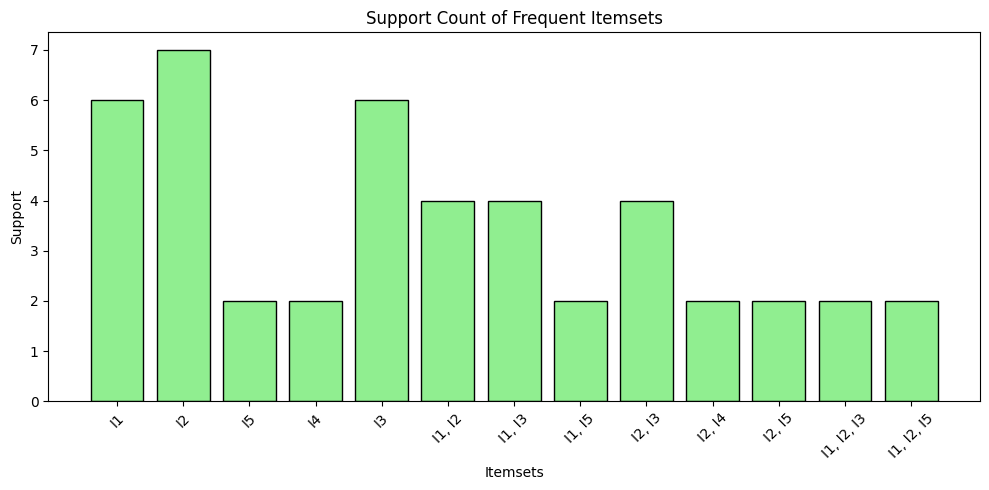

In [9]:
from itertools import combinations
import matplotlib.pyplot as plt

# Sample transactions
transactions = [
    ['I1', 'I2', 'I5'],
    ['I2', 'I4'],
    ['I2', 'I3'],
    ['I1', 'I2', 'I4'],
    ['I1', 'I3'],
    ['I2', 'I3'],
    ['I1', 'I3'],
    ['I1', 'I2', 'I3', 'I5'],
    ['I1', 'I2', 'I3']
]

# Minimum support threshold
min_support = 2

# === Step 1: Count support for 1-itemsets ===
def get_frequent_1_itemsets(transactions, min_support):
    item_counts = {}
    for transaction in transactions:
        for item in transaction:
            item_counts[item] = item_counts.get(item, 0) + 1
    return { (item,): count for item, count in item_counts.items() if count >= min_support }

# === Step 2: Generate candidates of size k ===
def generate_candidates(prev_frequent_itemsets, k):
    items = set()
    for itemset in prev_frequent_itemsets:
        items.update(itemset)
    return list(combinations(sorted(items), k))

# === Step 3: Count support for candidate itemsets ===
def filter_frequent_itemsets(transactions, candidates, min_support):
    support_count = {c: 0 for c in candidates}
    for transaction in transactions:
        transaction_set = set(transaction)
        for c in candidates:
            if set(c).issubset(transaction_set):
                support_count[c] += 1
    return {itemset: count for itemset, count in support_count.items() if count >= min_support}

# === Apriori Main Algorithm ===
def apriori(transactions, min_support):
    all_frequent = []

    # Frequent 1-itemsets
    current_frequent = get_frequent_1_itemsets(transactions, min_support)
    all_frequent.append(current_frequent)

    k = 2
    while current_frequent:
        candidates = generate_candidates(current_frequent, k)
        current_frequent = filter_frequent_itemsets(transactions, candidates, min_support)
        if current_frequent:
            all_frequent.append(current_frequent)
        k += 1

    return all_frequent

# === Run and Display ===
frequent_itemsets = apriori(transactions, min_support)

# Print results
for level, itemsets in enumerate(frequent_itemsets, start=1):
    print(f"\nFrequent {level}-itemsets:")
    for itemset, count in itemsets.items():
        print(f"{itemset}: {count}")

# === Bar Plot ===
labels, counts = [], []
for itemsets in frequent_itemsets:
    for itemset, count in itemsets.items():
        labels.append(', '.join(itemset))
        counts.append(count)

plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='lightgreen', edgecolor='black')
plt.title("Support Count of Frequent Itemsets")
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()